In [1]:
#basic
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder # one hot coding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standarization
# Import module for k-protoype cluster
from kmodes.kmodes import KModes
from collections import Counter, defaultdict # coun the number of samples in each cluster

import random

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## Customer Segmentation

In [2]:
#df_subs = pd.read_csv("subscribers.csv")
df_subs=pd.read_pickle('subscribers')

In [3]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [4]:
df_q2 = df_subs.copy(deep=True)

In [5]:
features = ['op_sys','package_type','preferred_genre','age','male_TF']

In [6]:
df_q2 = df_q2[-(df_q2.age > 100 )]

In [7]:
df_q2 = df_q2.dropna(subset = features )

In [8]:
df_q2

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN


In [9]:
df_features = df_q2[features]

In [10]:
df_features.head()

,op_sys,package_type,preferred_genre,age,male_TF
496617,iOS,enhanced,regional,25.0,True
356799,Android,base,drama,30.0,False
681701,iOS,base,comedy,28.0,False
192823,Android,base,comedy,61.0,False
315863,iOS,base,drama,23.0,False


In [11]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144492 entries, 496617 to 598241
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   op_sys           144492 non-null  object 
 1   package_type     144492 non-null  object 
 2   preferred_genre  144492 non-null  object 
 3   age              144492 non-null  float64
 4   male_TF          144492 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.6+ MB


In [12]:
df_features['age'] = df_features['age']/(max(df_features['age'])-min(df_features['age']))

<ipython-input-12-1b310f524488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['age'] = df_features['age']/(max(df_features['age'])-min(df_features['age']))


In [13]:
df_features.isna().sum()

op_sys             0
package_type       0
preferred_genre    0
age                0
male_TF            0
dtype: int64

In [14]:
df_features['male_TF'] = df_features['male_TF'].astype('string')
df_features['male_TF'] = df_features['male_TF'].map({"True":1 ,"False":0})

<ipython-input-14-83f7e53e66df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['male_TF'] = df_features['male_TF'].astype('string')
<ipython-input-14-83f7e53e66df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['male_TF'] = df_features['male_TF'].map({"True":1 ,"False":0})


In [15]:
df_features.head()

,op_sys,package_type,preferred_genre,age,male_TF
496617,iOS,enhanced,regional,0.25,1
356799,Android,base,drama,0.30,0
681701,iOS,base,comedy,0.28,0
192823,Android,base,comedy,0.61,0
315863,iOS,base,drama,0.23,0


In [16]:
#get dummy

In [17]:
op_sys_d=pd.get_dummies(df_features['op_sys'])

df_features=pd.merge(df_features,op_sys_d,left_index=True,right_index=True)

package_type_d=pd.get_dummies(df_features['package_type'])

df_features=pd.merge(df_features,package_type_d,left_index=True,right_index=True)

preferred_genre_d=pd.get_dummies(df_features['preferred_genre'])

df_features=pd.merge(df_features,preferred_genre_d,left_index=True,right_index=True)

In [18]:
df_features = df_features.drop(['op_sys','package_type','preferred_genre'],axis = 1)

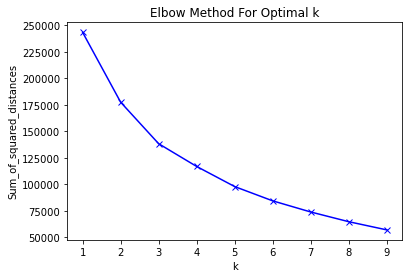

In [19]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(df_features)

In [20]:
# k == 3 || k == 4

In [21]:
#try 4
X = df_features
kmeans = KMeans(n_clusters=4)
res = kmeans.fit(X)
y = res.predict(X)
y = y.tolist()
df_q2['group'] = y

In [22]:
for i in range(4):
    n = i + 1
    locals()['df_group'+str(n)] = df_q2[df_q2['group'] == i]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='age', ylabel='Density'>

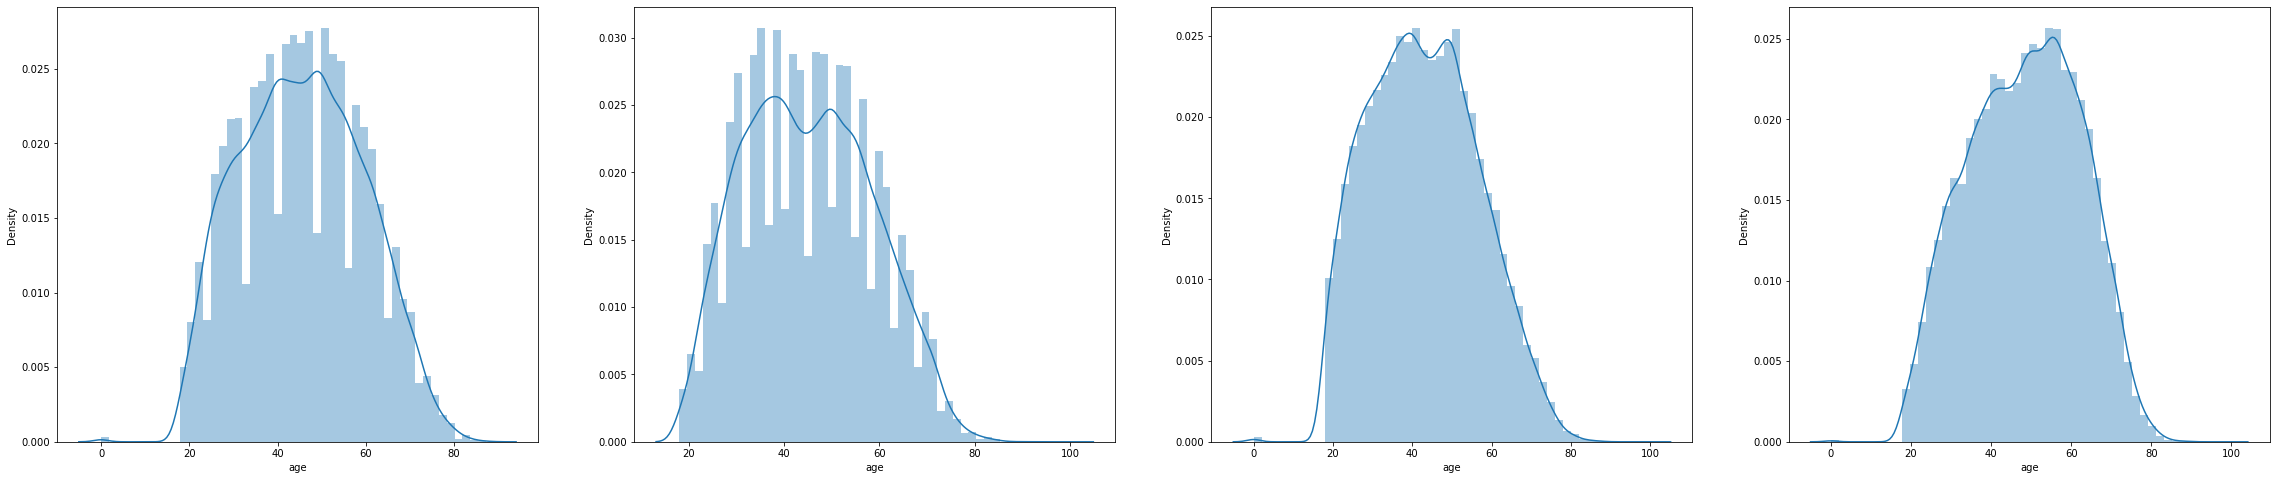

In [23]:
#age distribution of each group

plt.figure(figsize=(50,8))

plt.subplot(1,5,1)
sns.distplot(df_group1['age'])
#plt.show()

plt.subplot(1,5,2)
sns.distplot(df_group2['age'])
#plt.show()

plt.subplot(1,5,3)
sns.distplot(df_group3['age'])
#plt.show()

plt.subplot(1,5,4)
sns.distplot(df_group4['age'])
#plt.show()

In [24]:
# preferred op_sys
op_sys_list = list(set(df_q2['op_sys']))
dict_op_sys = defaultdict(list)
dict_op_sys['sys'] = op_sys_list
for i in range(4):
    c = i + 1
    n_list = list()
    for op_sys in op_sys_list:
        #print(op_sys)
        n_list.append((locals()['df_group'+str(c)]['op_sys'] == op_sys).sum())
    dict_op_sys['group'+str(c)] = n_list
df_op_sys =pd.DataFrame.from_dict(dict_op_sys)
df_op_sys

,sys,group1,group2,group3,group4
0,Android,0,37025,0,13646
1,iOS,37947,0,33369,22505


In [25]:
# preferred package type for each group
package_type_list = list(set(df_q2['package_type']))
dict_package_type = defaultdict(list)
dict_package_type['package'] = package_type_list
for i in range(4):
    c = i + 1
    n_list = list()
    for package_type in package_type_list:
        #print(package_type)
        n_list.append((locals()['df_group'+str(c)]['package_type'] == package_type).sum())
    dict_package_type['group'+str(c)] = n_list
df_package_type =pd.DataFrame.from_dict(dict_package_type)
df_package_type

,package,group1,group2,group3,group4
0,economy,0,3393,5549,4968
1,enhanced,0,12787,27820,9713
2,base,37947,20845,0,21470


In [26]:
# preferred genre for each group
g_list = list(set(df_q2['preferred_genre']))
dict_g = defaultdict(list)
dict_g['genre'] = g_list
for i in range(4):
    c = i + 1
    n_list = list()
    for g in g_list:
        #print(g)
        n_list.append((locals()['df_group'+str(c)]['preferred_genre'] == g).sum())
    dict_g['group'+str(c)] = n_list
df_genre =pd.DataFrame.from_dict(dict_g)

In [27]:
df_genre

,genre,group1,group2,group3,group4
0,drama,0,0,0,36151
1,comedy,32052,31091,28187,0
2,regional,2809,2389,2858,0
3,international,1797,2236,1323,0
4,other,1289,1309,1001,0


In [33]:
df_group1

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,group
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN,0
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,False,2020-03-09,False,0.0,0.6606,ar,False,False,NaN,0
277565,25393847,base,2.452687,regional,supplement OTT,28.751405,1.842940,False,57.0,False,...,False,2019-10-13,False,0.0,0.0367,ar,False,False,NaN,0
389385,23676530,base,NaN,comedy,access to exclusive content,24.401536,NaN,False,21.0,False,...,False,2020-03-24,False,0.0,0.3303,ar,False,False,NaN,0
659754,23299478,base,2.420285,comedy,replace OTT,22.951579,1.893894,False,35.0,False,...,False,2020-01-08,False,0.0,0.0367,ar,False,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514152,29324294,base,NaN,other,replace OTT,28.751405,NaN,False,59.0,False,...,False,2019-12-01,False,0.0,0.0367,ar,False,False,NaN,0
428794,23208350,base,NaN,comedy,replace OTT,25.851492,NaN,False,45.0,False,...,False,2019-10-31,False,0.0,0.0367,ar,False,False,NaN,0
632153,24614848,base,2.545474,regional,replace OTT,25.851492,1.949272,False,36.0,False,...,False,2020-02-06,False,0.0,0.1101,ar,False,False,NaN,0
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,True,2020-01-05,True,0.0,0.0367,ar,False,False,NaN,0


In [34]:
df_group1['age'].sum()/df_group1.shape[0]


45.60910659713823

In [35]:
df_group2['age'].sum()/df_group1.shape[0]

44.00643778200558

In [36]:
df_group3['age'].sum()/df_group1.shape[0]

37.68778482622709

In [37]:
df_group4['age'].sum()/df_group1.shape[0]

46.07921915907286

## Attribution and Allocation

In [28]:
#import data
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [29]:
# 6/30/19 monthly spend
tier1 = {'facebook':84800, 'email': 75000, 'search': 17300, 'brand sem intent google': 21400, 'affiliate': 11900, 'email_blast':10500, 'pinterest':5900, 'referral':6100}
# 7/31/19
tier1 = {'facebook':60000, 'email': 75600, 'search': 17300, 'brand sem intent google': 21300, 'affiliate': 12000, 'email_blast':29800, 'pinterest':6000, 'referral':6600}
# 8/31/19
tier1 = {'facebook':52300, 'email': 76100, 'search': 18100, 'brand sem intent google': 21300, 'affiliate': 16300, 'email_blast':65900, 'pinterest':6200, 'referral':6800}
# 9/30/19
tier1 = {'facebook':49000, 'email': 75800, 'search': 18900, 'brand sem intent google': 21300, 'affiliate': 16400, 'email_blast':73700, 'pinterest':6000, 'referral':7400}
# 10/31/19
tier1 = {'facebook':51300, 'email': 76000, 'search': 21000, 'brand sem intent google': 21400, 'affiliate': 12200, 'email_blast':32300, 'pinterest':6700, 'referral':7300}
# 11/30/19
tier1 = {'facebook':56100, 'email': 75900, 'search': 21400, 'brand sem intent google': 21600, 'affiliate': 11700, 'email_blast':9800, 'pinterest':6300, 'referral':7300}
# 12/31/19
tier1 = {'facebook':51400, 'email': 76100, 'search': 32100, 'brand sem intent google': 22200, 'affiliate': 12100, 'email_blast':3500, 'pinterest':7200, 'referral':8000}
# 1/31/20
tier1 = {'facebook':49000, 'email': 75500, 'search': 33600, 'brand sem intent google': 22700, 'affiliate': 14300, 'email_blast':300, 'pinterest':6700, 'referral':7400}
# 2/29/20
tier1 = {'facebook':49700, 'email': 76600, 'search': 30100, 'brand sem intent google': 21700, 'affiliate': 15000, 'email_blast':300, 'pinterest':6400, 'referral':6500}
# 3/31/20
tier1 = {'facebook':49100, 'email': 78000, 'search': 22700, 'brand sem intent google': 21200, 'affiliate': 17600, 'email_blast':300, 'pinterest':5900, 'referral':10000}


total_spend = {'facebook':552700, 'email': 760600, 'search': 232500, 'brand sem intent google': 216100, 'affiliate': 139500, 'email_blast':226400, 'pinterest':63300, 'referral':73400}


In [30]:
#calculate cac for last interaction model （attribution_survey）
df_subs["attribution_technical"].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [31]:
facebook_num = 80251
email_num = 25690
search_num = 25306
brand_sem_intent_google_num = 18524
affiliate_num = 9894
email_blast_num = 7277
pinterest_num = 6065
referral_num = 5170

total_num = {'facebook':80251, 'email': 25690, 'search': 25306, 'brand sem intent google': 18524, 'affiliate': 9894, 'email_blast':7277, 'pinterest':6065, 'referral':5170}

In [32]:
# Here we calculate the cac for last interaction
cac_last = {}
for key in total_spend.keys():
    cac_last[key] = int(total_spend[key])/int(total_num[key])
cac_last

{'facebook': 6.887141593251174,
 'email': 29.606850914752822,
 'search': 9.18754445586027,
 'brand sem intent google': 11.665946879723602,
 'affiliate': 14.09945421467556,
 'email_blast': 31.11172186340525,
 'pinterest': 10.436933223413025,
 'referral': 14.197292069632494}

## Churn

In [38]:
#import data
df_conser = pd.read_pickle('customer_service_reps')
df_eng = pd.read_pickle('engagement')
#df_subs

In [39]:
df_conser.reset_index(inplace = True)
df_conser.drop(['index'],axis = 1,inplace = True)

In [40]:
df_eng.reset_index(inplace = True)
df_eng.drop(['index'],axis = 1,inplace = True)

In [42]:
df_subs.reset_index(inplace = True)
df_subs.drop(['index'],axis = 1,inplace = True)

In [44]:
df_subs.loc[df_subs['attribution_technical'] == 'brand sem intent google', 'attribution_technical'] = 'brand_sem_intent_google'


In [45]:
df_subs_churn = df_subs.copy(deep=True)

In [46]:
listuser = set(df_conser['subid'])
df_current = df_conser.drop_duplicates('subid')
df_current.index = df_current['subid']

In [47]:
df_num_period = pd.DataFrame(df_eng.groupby('subid')['payment_period'].max() + 1)

In [48]:
df_eng = df_eng.groupby('subid').sum()
df_eng.drop(['payment_period'],axis =1,inplace =True)

In [49]:
df_eng = pd.concat([df_eng, df_num_period], axis = 1)

In [51]:
eng_fea_list = ['app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']
for i in eng_fea_list:
    df_eng[i] = df_eng[i]/df_eng['payment_period']

In [ ]:
#df_whole = pd.merge(df_subs,df_eng,on=['subid'],how='left')

In [ ]:

for i in tqdm(range(df_sub.shape[0])):
    try:
        user_id = df_sub_churn.loc[i,'subid']
        df_sub_churn.loc[i,'current_sub_TF'] = df_current.loc[user_id,'current_sub_TF']
        for feature in eng_fea_list:
            df_sub_churn.loc[i,feature] = df_eng_churn.loc[user_id,feature]
    except: 
        continue


In [ ]:
df_sub_churn.to_csv('df_sub_churn.csv', index = False)

In [53]:
data = pd.read_csv("df_sub_churn.csv")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            227628 non-null  int64  
 1   package_type                     192054 non-null  object 
 2   num_weekly_services_utilized     117178 non-null  float64
 3   preferred_genre                  191302 non-null  object 
 4   intended_use                     224079 non-null  object 
 5   weekly_consumption_hour          189698 non-null  float64
 6   num_ideal_streaming_services     115458 non-null  float64
 7   retarget_TF                      227628 non-null  bool   
 8   age                              192459 non-null  float64
 9   male_TF                          227359 non-null  object 
 10  country                          227628 non-null  object 
 11  attribution_technical            227628 non-null  object 
 12  at

In [55]:
data['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [66]:
feature_churn = ['age','op_sys',
                 'num_weekly_services_utilized',
                 'weekly_consumption_hour',
                 'num_ideal_streaming_services',
                 'app_opens',
                 'num_videos_completed',
                 'cust_service_mssgs',
                 'num_videos_more_than_30_seconds',
                 'num_videos_rated',
                 'num_series_started',
                 'current_sub_TF']

In [67]:
feature_churn

['age',
 'op_sys',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'app_opens',
 'num_videos_completed',
 'cust_service_mssgs',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'current_sub_TF']

In [68]:
df_churn = data[feature_churn]
df_churn = df_churn.dropna()
df_churn = df_churn[-(df_churn.age > 70)]

In [69]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77040 entries, 2 to 227624
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              77040 non-null  float64
 1   op_sys                           77040 non-null  object 
 2   num_weekly_services_utilized     77040 non-null  float64
 3   weekly_consumption_hour          77040 non-null  float64
 4   num_ideal_streaming_services     77040 non-null  float64
 5   app_opens                        77040 non-null  float64
 6   num_videos_completed             77040 non-null  float64
 7   cust_service_mssgs               77040 non-null  float64
 8   num_videos_more_than_30_seconds  77040 non-null  float64
 9   num_videos_rated                 77040 non-null  float64
 10  num_series_started               77040 non-null  float64
 11  current_sub_TF                   77040 non-null  object 
dtypes: float64(10), o

In [70]:
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].astype('string')
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].map({"True":0 ,"False":1})
df_churn = df_churn.rename(columns = {'current_sub_TF':'churn_TF'})

In [71]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77040 entries, 2 to 227624
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              77040 non-null  float64
 1   op_sys                           77040 non-null  object 
 2   num_weekly_services_utilized     77040 non-null  float64
 3   weekly_consumption_hour          77040 non-null  float64
 4   num_ideal_streaming_services     77040 non-null  float64
 5   app_opens                        77040 non-null  float64
 6   num_videos_completed             77040 non-null  float64
 7   cust_service_mssgs               77040 non-null  float64
 8   num_videos_more_than_30_seconds  77040 non-null  float64
 9   num_videos_rated                 77040 non-null  float64
 10  num_series_started               77040 non-null  float64
 11  churn_TF                         77040 non-null  int64  
dtypes: float64(10), i

In [82]:
df_churn_dummy = pd.get_dummies(df_churn)

In [83]:
df_churn_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77040 entries, 2 to 227624
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              77040 non-null  float64
 1   num_weekly_services_utilized     77040 non-null  float64
 2   weekly_consumption_hour          77040 non-null  float64
 3   num_ideal_streaming_services     77040 non-null  float64
 4   app_opens                        77040 non-null  float64
 5   num_videos_completed             77040 non-null  float64
 6   cust_service_mssgs               77040 non-null  float64
 7   num_videos_more_than_30_seconds  77040 non-null  float64
 8   num_videos_rated                 77040 non-null  float64
 9   num_series_started               77040 non-null  float64
 10  churn_TF                         77040 non-null  int64  
 11  op_sys_Android                   77040 non-null  uint8  
 12  op_sys_iOS       

In [84]:
df_churn_dummy

,age,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,op_sys_Android,op_sys_iOS
2,25.0,3.362885,36.001186,1.951776,2.0,13.0,2.0,13.0,0.0,1.0,1,0,1
6,61.0,2.049135,20.051667,1.860289,20.0,91.0,8.5,91.0,3.0,19.5,0,1,0
7,23.0,3.002048,34.551230,1.870503,52.0,42.0,5.0,103.0,0.0,14.5,0,0,1
12,57.0,2.452687,28.751405,1.842940,12.0,18.0,4.0,22.0,0.0,3.0,1,0,1
13,54.0,2.876856,33.101274,1.867353,71.0,52.0,6.0,68.0,0.0,12.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,44.0,3.672180,27.301448,2.317104,2.0,3.0,1.0,11.0,0.0,1.0,0,0,1
227619,32.0,2.514545,30.201361,1.968236,3.0,12.0,4.0,13.0,0.0,1.0,1,1,0
227622,43.0,2.169904,24.401536,1.881068,31.0,47.0,5.0,59.0,0.0,8.0,1,0,1
227623,38.0,2.594078,28.751405,1.905485,16.0,20.0,3.0,36.0,0.0,2.0,1,0,1


In [78]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
df_train, df_test = model_selection.train_test_split(df_churn_dummy, test_size=0.3)

In [86]:
df_train.head()

,age,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,op_sys_Android,op_sys_iOS
139581,31.0,3.141965,34.551230,1.919339,8.0,32.0,3.0,42.0,0.0,5.0,1,0,1
47990,41.0,2.258275,22.951579,1.920160,9.0,32.0,2.0,47.0,0.0,6.0,1,1,0
81920,42.0,2.184634,22.951579,1.854940,2.0,8.0,2.0,13.0,0.0,1.0,1,1,0
182553,58.0,2.442377,27.301448,1.871023,7.0,9.0,1.0,22.0,0.0,1.0,1,0,1
34895,38.0,2.022624,21.501623,1.848561,10.0,14.0,16.0,18.0,0.0,2.0,1,0,1


In [91]:
y_col_name = 'churn_TF'
#x_col_name = ['age','male_TF','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','app_opens','num_videos_completed','cust_service_mssgs','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']
x_col_name = ['age',
                 'num_weekly_services_utilized',
                 'weekly_consumption_hour',
                 'num_ideal_streaming_services',
                 'app_opens',
                 'num_videos_completed',
                 'cust_service_mssgs',
                 'num_videos_more_than_30_seconds',
                 'num_videos_rated',
                 'num_series_started','op_sys_Android','op_sys_iOS']
add_constant_TF = True

In [92]:
import statsmodels.api as sm
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [93]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:37:04   Log-Likelihood:                -19558.
No. Observations:               53928   AIC:                         3.914e+04
Df Residuals:                   53916   BIC:                         3.925e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [95]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.385686
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                53928
Model:                          Logit   Df Residuals:                    53916
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.2144
Time:                        16:38:36   Log-Likelihood:                -20799.
converged:                       True   LL-Null:                       -26475.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                              

In [96]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

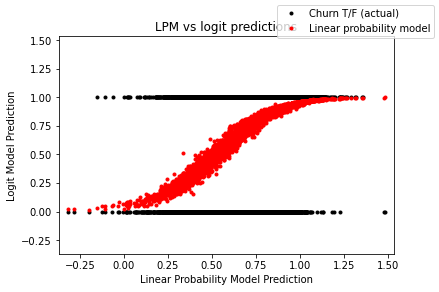

In [101]:

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [103]:
# --- evaluate model predictions using numerical quantification (ROC curves)
from sklearn.metrics import confusion_matrix
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

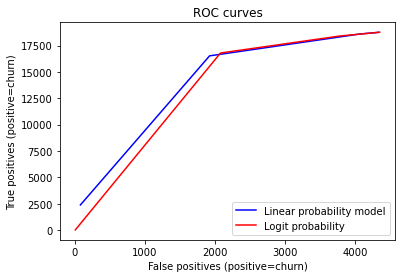

In [104]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [105]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.5141
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [106]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [108]:
import copy
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [109]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

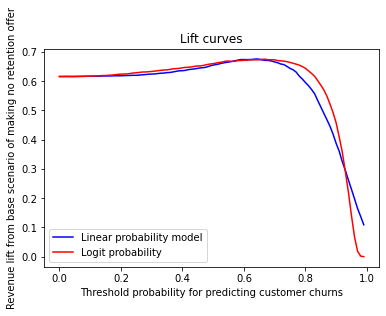

In [110]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [111]:
lmp_offer_max = df_lift_threshold['lpm_offer'].max()
lmp_offer_max

0.6759484939066449

In [112]:
logit_offer_max = df_lift_threshold['logit_offer'].max()
logit_offer_max

0.6749367670728903

In [113]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_threshold['threshold'][i])

0.64


In [114]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['logit_offer'][i] == logit_offer_max:
        print(df_lift_threshold['threshold'][i])

0.67


In [115]:
threshold = 0.655

In [116]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

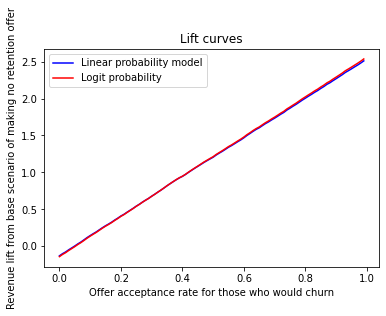

In [117]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [118]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)
    
    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

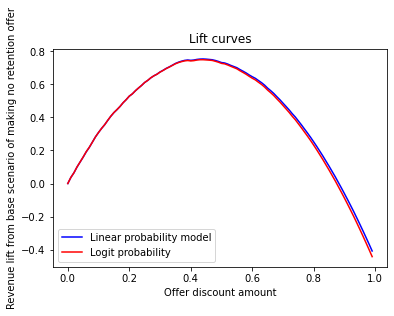

In [119]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [120]:
lmp_offer_max = df_lift_discount_amount['lpm_offer'].max()
lmp_offer_max

0.7535065532306278

In [121]:
logit_offer_max = df_lift_discount_amount['logit_offer'].max()
logit_offer_max

0.7489445849620604

In [122]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_discount_amount['discount_amount'][i])

0.44


In [123]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['logit_offer'][i] == logit_offer_max:
        print(df_lift_discount_amount['discount_amount'][i])

0.44
